## __Phase 2 Project Submission__<br>
### Group 3<br>
<br>
Members:<br>
Lilian Ngige<br>
Sharon Njogu<br>
Karanja Gakio<br>
John Elvis<br>

Student pace: part time <br>
Scheduled project review date/time: <br>
Instructor name: Asha Deen <br>

## Project Overview


## Business problem

The real estate agency faces a significant challenge in assisting homeowners with optimizing the value of their properties through strategic renovations. Homeowners often consider making improvements to their homes before selling them, but they lack data-driven insights on which renovations will yield the highest return on investment (ROI) and by how much. This problem affects both homeowners who may make costly renovations that don't add value and the agency itself, which may struggle to provide valuable guidance to clients.

## Project Objectives

#### Develop a pricing model:
- The model should incorporate the factors such as living room square feet, number of bathrooms/bedrooms, grade ratings. This should help the agency to accurately price their properties.
- Evaluate the model's performance using appropriate regression metrics.

#### Improve marketing strategies:
- For example, the house sale agency can develop focused marketing initiatives highlighting the key factors influencing price, such as the quantity of bathrooms, living space, and condition and grade rate.

#### Assist Homebuyers in Making Informed Decisions:
- Empower homebuyers with accurate price estimates so they can make informed decisions and negotiate effectively.

#### Identify Key Features
- Determine house which features have the most significant impact on house prices.
- Explore correlations and relationships between different features and the target variable (price).


## Data Exploration & Understanding

Importing the relevant libraries


In [1]:
 # Pandas for reading the data and analysis
import pandas as pd

# Numpy for numbers
import numpy as np

# Seaborn and Matplotlib for Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

#Statsmodel for statistical analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error


### Loading the data

Load the data

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Cleaning

We find columns with missing values:

In [5]:
#Missing values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Dropping the missing values in `waterfront`, `yr_renovated` and `view` columns

In [6]:
#Dropping the missing values in waterfront, yr_renovated and view columns
df.dropna(subset = ["waterfront"], inplace = True)
df.dropna(subset = ["yr_renovated"], inplace = True)
df.dropna(subset = ["view"], inplace = True)

# Reindexing after dropping and removing the missing values
df.reset_index(drop=True, inplace=True)

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Find duplicate values

In [8]:
# checking for any duplicates
df.duplicated().any()

False

Finding: Our data has no duplicate values.

In [9]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Calculating the correlation between the 'price' column and all other columns in the DataFrame 'df

In [10]:
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.706189
sqft_above       0.612014
sqft_living15    0.581572
bathrooms        0.526155
lat              0.306607
bedrooms         0.305489
floors           0.259505
yr_renovated     0.122731
sqft_lot         0.084504
sqft_lot15       0.079402
yr_built         0.049345
long             0.021215
id              -0.015183
zipcode         -0.049502
Name: price, dtype: float64

### Categorical data encoding

Here we convert categorical data to numerical so that we can see its numeric correlation with price

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15762 entries, 0 to 15761
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

  Spliting `grade` and creating a new column `rating` so that we can see its numeric correlation with price

In [12]:
#Spliting grade and creating a new column 'rating' so that we can see its numeric correlation with price
df[["numerical_grade", "rating"]] = df["grade"].str.split(n=1, expand=True)
df["numerical_grade"] = df["numerical_grade"].astype(int)
df.drop('grade', axis=1, inplace=True)

 Create copy of the data frame with the features that we are working with copy of the data frame with the features that we are working with

In [13]:
# A copy of the data frame with the features that we are working with
df_subset = df[[ 'price', 'bedrooms', 'bathrooms', 'sqft_living',  'waterfront','sqft_above','sqft_living15','numerical_grade', 'rating',"floors",'zipcode','date']].copy()
df_subset

,price,bedrooms,bathrooms,sqft_living,waterfront,sqft_above,sqft_living15,numerical_grade,rating,floors,zipcode,date
0,538000.0,3,2.25,2570,NO,2170,1690,7,Average,2.0,98125,12/9/2014
1,604000.0,4,3.00,1960,NO,1050,1360,7,Average,1.0,98136,12/9/2014
2,510000.0,3,2.00,1680,NO,1680,1800,8,Good,1.0,98074,2/18/2015
3,1230000.0,4,4.50,5420,NO,3890,4760,11,Excellent,1.0,98053,5/12/2014
4,257500.0,3,2.25,1715,NO,1715,2238,7,Average,2.0,98003,6/27/2014
...,...,...,...,...,...,...,...,...,...,...,...,...
15757,475000.0,3,2.50,1310,NO,1180,1330,8,Good,2.0,98116,2/19/2015
15758,360000.0,3,2.50,1530,NO,1530,1530,8,Good,3.0,98103,5/21/2014
15759,400000.0,4,2.50,2310,NO,2310,1830,8,Good,2.0,98146,2/23/2015
15760,402101.0,2,0.75,1020,NO,1020,1020,7,Average,2.0,98144,6/23/2014


Column `waterfront` contains categorical data . We convert `waterfront` to numerical values

In [14]:
#convert waterfront to numerical values
df_subset["waterfront"] = df_subset["waterfront"].map({'NO': 0, 'YES': 1})
df_subset

,price,bedrooms,bathrooms,sqft_living,waterfront,sqft_above,sqft_living15,numerical_grade,rating,floors,zipcode,date
0,538000.0,3,2.25,2570,0,2170,1690,7,Average,2.0,98125,12/9/2014
1,604000.0,4,3.00,1960,0,1050,1360,7,Average,1.0,98136,12/9/2014
2,510000.0,3,2.00,1680,0,1680,1800,8,Good,1.0,98074,2/18/2015
3,1230000.0,4,4.50,5420,0,3890,4760,11,Excellent,1.0,98053,5/12/2014
4,257500.0,3,2.25,1715,0,1715,2238,7,Average,2.0,98003,6/27/2014
...,...,...,...,...,...,...,...,...,...,...,...,...
15757,475000.0,3,2.50,1310,0,1180,1330,8,Good,2.0,98116,2/19/2015
15758,360000.0,3,2.50,1530,0,1530,1530,8,Good,3.0,98103,5/21/2014
15759,400000.0,4,2.50,2310,0,2310,1830,8,Good,2.0,98146,2/23/2015
15760,402101.0,2,0.75,1020,0,1020,1020,7,Average,2.0,98144,6/23/2014


We also convert column 'condition' to have numerical data for analysis:

In [15]:
#mapping conditions to numerical value

condition_counts = df['condition'].value_counts()
condition_counts
# Creating a mapping dictionary based on my understanding of the values
condition_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Average': 3,
    'Good': 4,
    'Very Good': 5,
}
df['condition_encoded'] = df['condition'].map(condition_mapping)

We sort the correlation in descending order to find out which coefficient valuesare suitable:

In [16]:
df_subset.corr()['price'].sort_values(ascending = False)

price              1.000000
sqft_living        0.706189
numerical_grade    0.664146
sqft_above         0.612014
sqft_living15      0.581572
bathrooms          0.526155
bedrooms           0.305489
waterfront         0.274212
floors             0.259505
zipcode           -0.049502
Name: price, dtype: float64

### Handling Outliers

We find the outliers in all the columns:

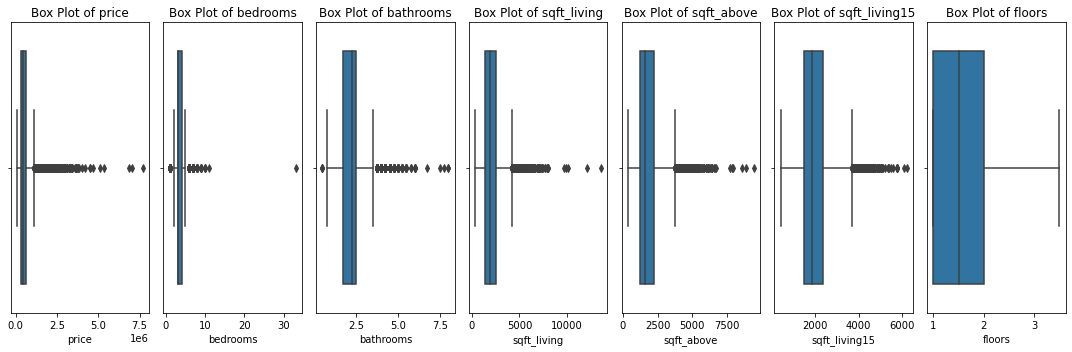

In [17]:

# Select the desired columns using double square brackets
df1 = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15', 'floors']]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(df1.columns), figsize=(15, 5))

# Loop through each independent variable and create a box plot
for i, var in enumerate(df1.columns):
    sns.boxplot(x=df[var], ax=axes[i])
    axes[i].set_title(f'Box Plot of {var}')

# Adjust the layout
plt.tight_layout()
plt.show()


We see the outlier on bedrooms which we change to 3 bedrooms, error likely due to a typographic error

In [18]:
#Bedroom outlier
df.loc[(df.bedrooms == 33), 'bedrooms'] = 3


We filter out the outliers in the price columns using z-score factor:

In [19]:
# Calculate the Z-scores for 'price'
z_scores = np.abs(stats.zscore(df['price']))

# Define a threshold for considering data points as outliers
threshold = 3

# Identify and remove outliers based on the threshold
df = df[(z_scores < threshold)]

### Visualize the outlier data :

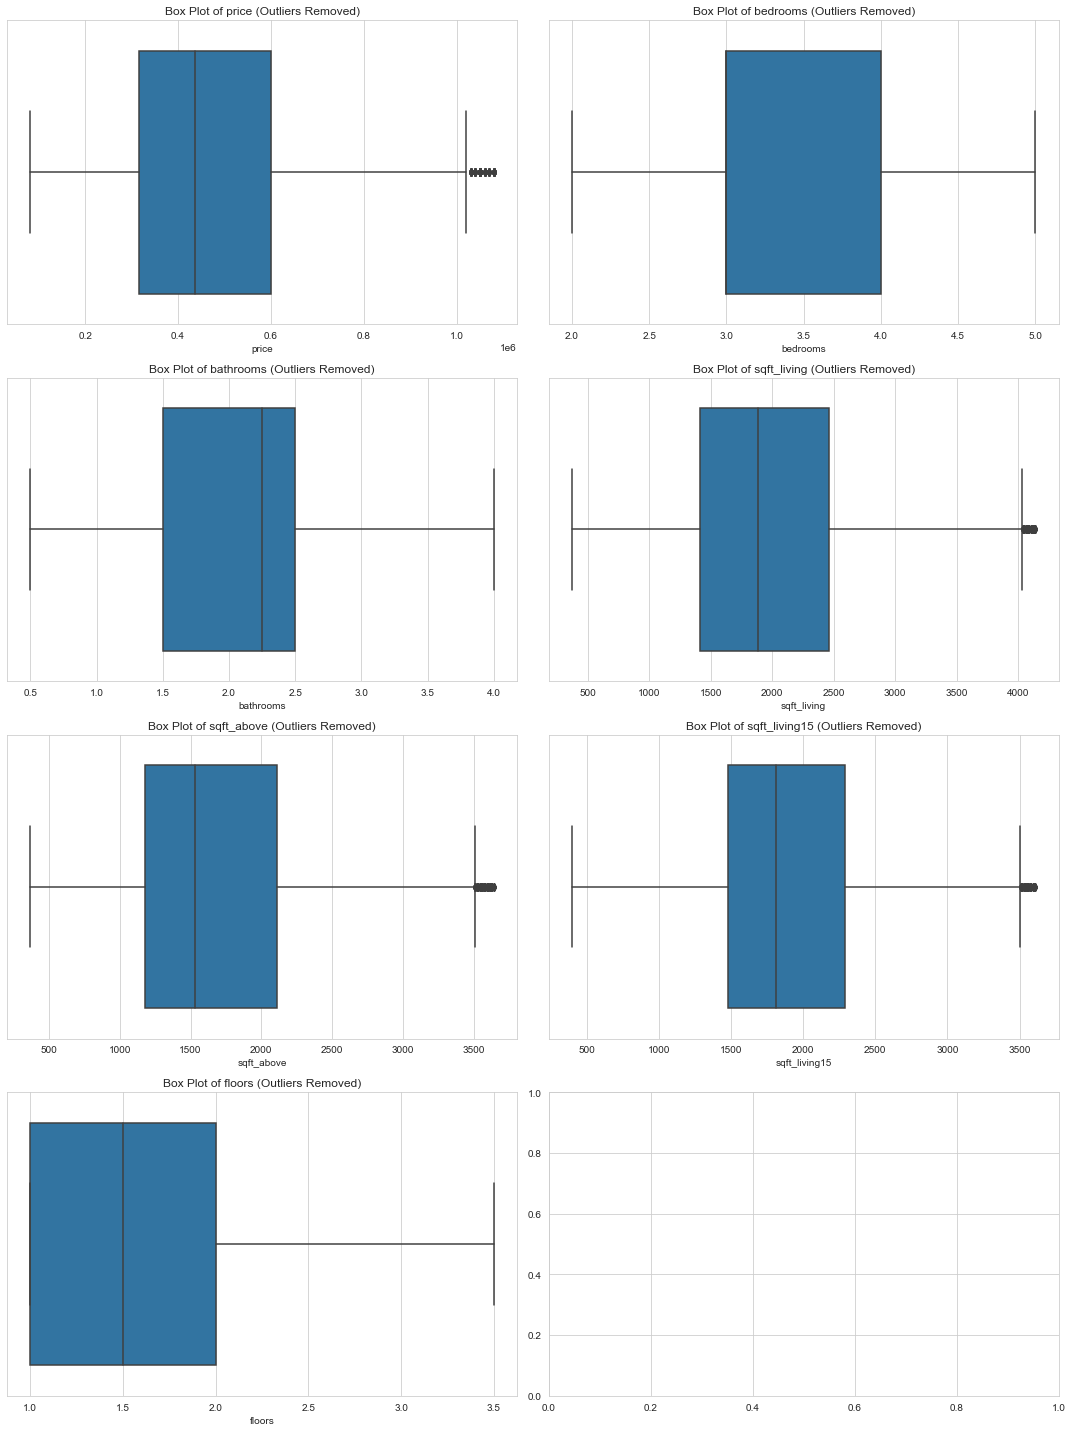

In [20]:
# Set the style
sns.set_style("whitegrid")

# Select the desired columns using double square brackets [[]]
df1 = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15', 'floors']]

# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Calculate the number of rows and columns in the subplot grid
num_cols = len(df1.columns)
num_rows = (num_cols + 1) // 2  # Ensure at least 2 rows if there are more than 2 columns

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))

# Loop through each independent variable and create a box plot
for i, var in enumerate(df1.columns):
    row, col = i // 2, i % 2
    # Remove outliers based on IQR
    df_no_outliers = remove_outliers(df, var)

    sns.boxplot(x=df_no_outliers[var], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {var} (Outliers Removed)')

# Adjust the layout
plt.tight_layout()
plt.show()

###  Checking correlations and multicollinearity

The main target variable is price.We look at the correlation coefficients for all of the predictor variables to find the one with the highest correlation with price.

In [21]:
#correlation coefficients for all predictor variables to find highest correlation with price

df.corr()["price"].sort_values(ascending = False)

price                1.000000
numerical_grade      0.672624
sqft_living          0.667785
sqft_living15        0.595892
sqft_above           0.568936
bathrooms            0.495877
lat                  0.386719
bedrooms             0.320003
floors               0.279082
yr_renovated         0.109455
sqft_lot             0.091034
sqft_lot15           0.087374
yr_built             0.059670
long                 0.048770
condition_encoded    0.032775
id                  -0.004143
zipcode             -0.032781
Name: price, dtype: float64

### Visualize the collinearity using plots

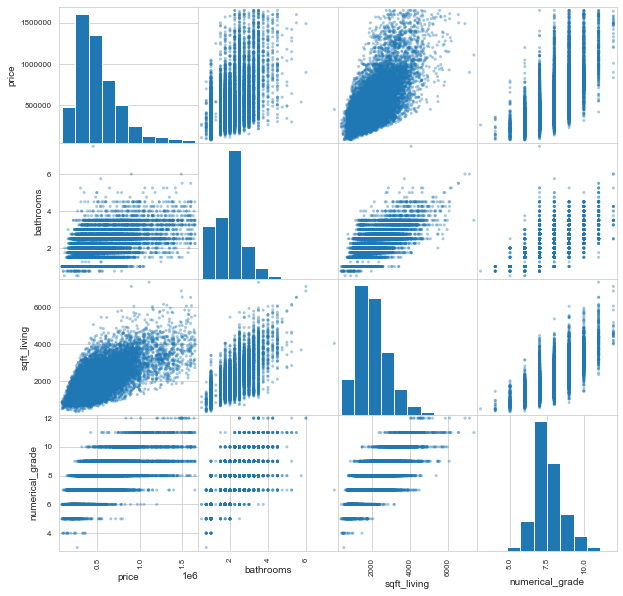

In [22]:
# A further look at top house attributes
attributes = ['price', 'bathrooms', 'sqft_living', 'numerical_grade']

pd.plotting.scatter_matrix(df[attributes], figsize = [10, 10], alpha=0.4);
plt.show()

## DATA MODELLING

### Model 1 : Bi Variant Regression Model

In [23]:
#Data Preparation
new_selects = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'condition_encoded', 'numerical_grade', 'sqft_above', 'yr_built', 'yr_renovated']
X = df[new_selects]  # Independent variables
y = df['price']  # Dependent variable

In [24]:
x_variable = df[['sqft_living','bathrooms']]
x_variable

,sqft_living,bathrooms
0,2570,2.25
1,1960,3.00
2,1680,2.00
3,5420,4.50
4,1715,2.25
...,...,...
15757,1310,2.50
15758,1530,2.50
15759,2310,2.50
15760,1020,0.75


In [25]:
bi_variable = df[['sqft_living','bathrooms']]
X = df[new_selects]  # Independent variables
y = df['price']  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
x_model = sm.OLS(y, sm.add_constant(x_variable))
x_model_results = x_model.fit()

print(x_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     6230.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:23:52   Log-Likelihood:            -2.1049e+05
No. Observations:               15480   AIC:                         4.210e+05
Df Residuals:                   15477   BIC:                         4.210e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.882e+04   4796.089     16.434      

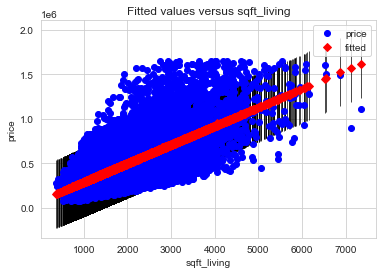

In [27]:
#Plotting the fit of the baseline model on the "sqft_living" feature
sm.graphics.plot_fit(x_model_results, 'sqft_living')
plt.show()

In [28]:
# Train the bi-variant model
from sklearn.linear_model import LinearRegression

bi_variant_model = LinearRegression()
bi_variant_model.fit(X_train[['sqft_living', 'bathrooms']], y_train)

# Make predictions
y_pred_bi_variant = bi_variant_model.predict(X_test[['sqft_living', 'bathrooms']])

In [29]:
#test the model
bi_variant_mse = mean_squared_error(y_test, y_pred_bi_variant)
bi_variant_r_squared = r2_score(y_test, y_pred_bi_variant)

print(f"Bi-Variant Model Mean Squared Error (MSE): {bi_variant_mse}")
print(f"Bi-Variant Model R-squared (R^2): {bi_variant_r_squared}")

Bi-Variant Model Mean Squared Error (MSE): 37776135106.88947
Bi-Variant Model R-squared (R^2): 0.436129620029715


The R-squared value of approximately 0.4361 indicates that the bivariate regression model explains about 43.61%.This suggests that the model captures a moderate amount of the relationship between the independent and dependent variables. 

### Model 2:  Simple Linear Regression Model

In [30]:
df.corr()["price"].sort_values(ascending = False)

price                1.000000
numerical_grade      0.672624
sqft_living          0.667785
sqft_living15        0.595892
sqft_above           0.568936
bathrooms            0.495877
lat                  0.386719
bedrooms             0.320003
floors               0.279082
yr_renovated         0.109455
sqft_lot             0.091034
sqft_lot15           0.087374
yr_built             0.059670
long                 0.048770
condition_encoded    0.032775
id                  -0.004143
zipcode             -0.032781
Name: price, dtype: float64

From the variable coefficients above there is a relatively strong positive correlation of approximately 0.67 between the square footage  of living space (sqft_living) and the price of the properties.
This suggests that larger living spaces are associated with higher property prices.

In [31]:
#preparing data for regression analysis
x = df['sqft_living']
y = df['price']
# We use Baseline modelto find the significance
model = sm.OLS(y, sm.add_constant(x))
model_results = model.fit()
#baseline_results = baseline_model.fit()

print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.246e+04
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:23:54   Log-Likelihood:            -2.1050e+05
No. Observations:               15480   AIC:                         4.210e+05
Df Residuals:                   15478   BIC:                         4.210e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.232e+04   4125.922     19.952      

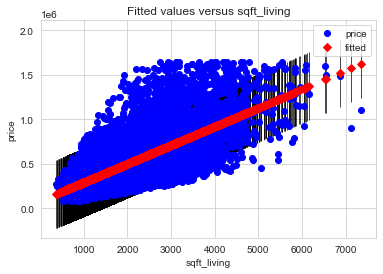

In [32]:
#Plotting the fit of the baseline model on the "sqft_living" feature
sm.graphics.plot_fit(model_results, 'sqft_living')
plt.show()


• The model is statistically significant overall, with an F-statistic p-value well below 0.05
R-squared value is 0.45, indicating that approximately 45% of the variance in the price can be explained by the sqft_living variable.
This suggests that 'sqft_living' has some predictive power for determining property prices.

• The model coefficients (price and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05
The coefficient for "const" is 8.232e+04, and the coefficient for "sqft_living" is 209.1581. These values indicate that, on average, for each additional square foot of living space, the predicted price increases by approximately 209.1581 units.

In [33]:
#We use condition feature to determine relationship with price 
y = df['price']
x = df['condition_encoded']

model = sm.OLS(y, sm.add_constant(x))
model_results = model.fit()

print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     16.64
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           4.53e-05
Time:                        13:23:55   Log-Likelihood:            -2.1506e+05
No. Observations:               15480   AIC:                         4.301e+05
Df Residuals:                   15478   BIC:                         4.301e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.635e+05   1.12e+0

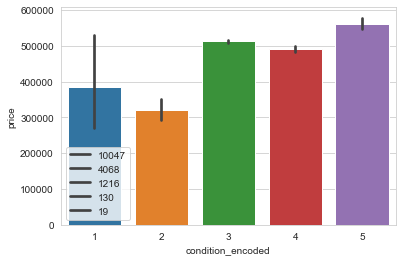

In [34]:
sns.barplot(x='condition_encoded',y='price',data=df)
plt.show
plt.legend(df['condition_encoded'].value_counts())

Using the condition feature in our model didn't improve our R-Squared. Thus, we'll drop because of no significant relation to the price.The sqft_living shows correlation to price.

### MODEL 3 : Multilinear regression model

In [35]:
correlation_matrix = df.corr()
correlation_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,numerical_grade,condition_encoded
id,1.000000,-0.004143,0.013523,0.014773,0.001729,-0.136681,0.024391,-0.000988,0.025080,-0.010289,-0.007087,-0.003426,0.019882,0.008733,-0.141853,0.019599,-0.023642
price,-0.004143,1.000000,0.320003,0.495877,0.667785,0.091034,0.279082,0.568936,0.059670,0.109455,-0.032781,0.386719,0.048770,0.595892,0.087374,0.672624,0.032775
bedrooms,0.013523,0.320003,1.000000,0.519498,0.600611,0.026815,0.176950,0.483778,0.165527,0.011006,-0.152245,-0.016709,0.141852,0.393778,0.025998,0.350986,0.011611
bathrooms,0.014773,0.495877,0.519498,1.000000,0.733849,0.074132,0.505748,0.658154,0.528154,0.035993,-0.199736,0.015188,0.239030,0.549145,0.077784,0.639796,-0.140354
sqft_living,0.001729,0.667785,0.600611,0.733849,1.000000,0.164678,0.354007,0.861866,0.342983,0.031514,-0.200247,0.040871,0.270250,0.752848,0.179585,0.741094,-0.074899
sqft_lot,-0.136681,0.091034,0.026815,0.074132,0.164678,1.000000,-0.014696,0.171598,0.048958,0.002916,-0.130807,-0.087761,0.229663,0.144624,0.715298,0.100340,-0.014825
floors,0.024391,0.279082,0.176950,0.505748,0.354007,-0.014696,1.000000,0.533872,0.496814,-0.005798,-0.058538,0.053043,0.134194,0.272847,-0.016925,0.456473,-0.267914
sqft_above,-0.000988,0.568936,0.483778,0.658154,0.861866,0.171598,0.533872,1.000000,0.447199,0.001766,-0.262919,-0.010999,0.374276,0.726007,0.185333,0.735449,-0.172535
yr_built,0.025080,0.059670,0.165527,0.528154,0.342983,0.048958,0.496814,0.447199,1.000000,-0.220912,-0.341660,-0.145991,0.409850,0.342185,0.068880,0.466503,-0.362958
yr_renovated,-0.010289,0.109455,0.011006,0.035993,0.031514,0.002916,-0.005798,0.001766,-0.220912,1.000000,0.072359,0.029305,-0.070296,-0.025263,0.002668,-0.002547,-0.061441


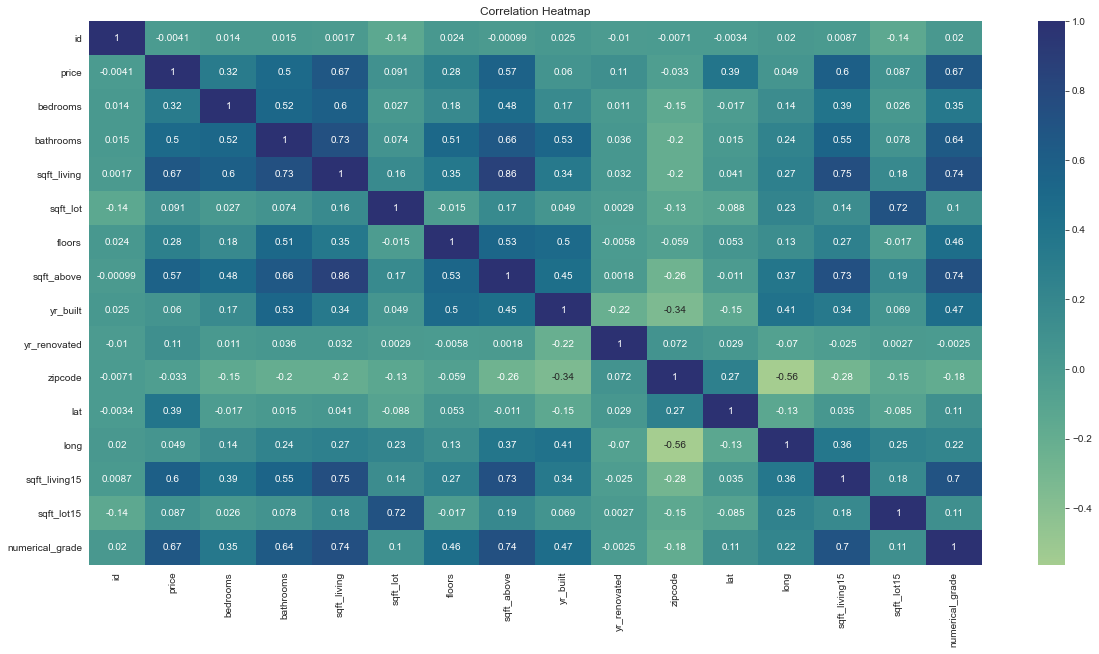

In [36]:
plt.figure(figsize=(20,10))
corr_matrix = df[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'numerical_grade', 'rating']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.title('Correlation Heatmap')

plt.show()

The heatmap above displays the correlation of all the columns in our data frame

**Data Preparation and Train-Test Split for MultiLinear Regression**

In [37]:
#Data Preparation 

new_selects = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'condition_encoded', 'numerical_grade', 'sqft_above', 'yr_built', 'yr_renovated']
X = df[new_selects]  # Independent variables
y = df['price']  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Training and Using a Linear Regression Model for Price Prediction**


In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
#Generating Predictions using a Trained Linear Regression Model
y_pred = model.predict(X_test)
y_pred

array([330505.2181879 , 445524.99253812, 277508.9660274 , ...,
       265771.34791838, 504148.66103087, 504600.59677642])

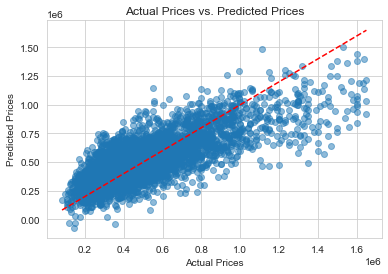

In [40]:
# plot the fit of the  model on the "price" feature

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")

x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linestyle='--')

plt.show()

The above scatter plot shows that data points are below the reference line meaning there is underestimations by the model. The model predicted lower prices than the actual prices.

In [41]:
# Performing OLS Regression
intercept = sm.add_constant(X_train)  # Adding a constant term / an intercept

#generating OLS model
model_sm = sm.OLS(y_train, intercept).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1930.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:24:00   Log-Likelihood:            -1.4541e+05
No. Observations:               10836   AIC:                         2.908e+05
Df Residuals:                   10826   BIC:                         2.909e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.299e+06   1.48e+0

### Multicollinearity visualization

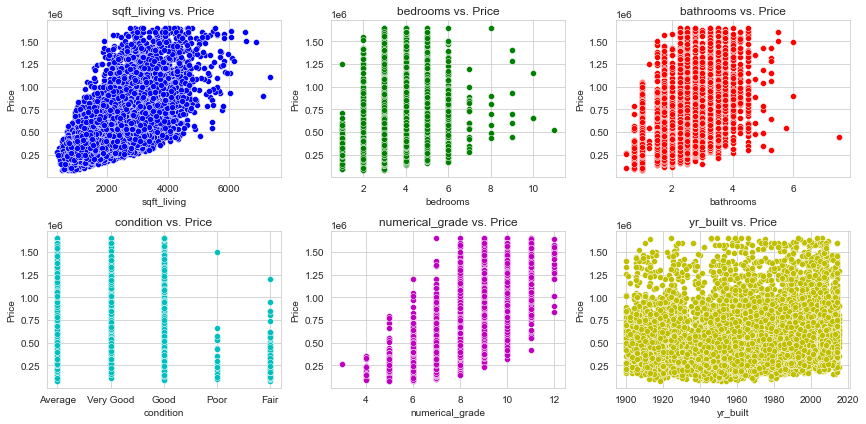

In [42]:

num_features = ['sqft_living', 'bedrooms', 'bathrooms', 'condition', 'numerical_grade', 'yr_built']

# subplots with multiple scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# colors for the scatter plots
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# scatter plots for each numerical feature vs. price
for i, feature in enumerate(num_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.scatterplot(x=df[feature], y=df['price'], ax=ax, color=colors[i])
    ax.set_title(f'{feature} vs. Price')
    ax.set_ylabel('Price')
    
    if feature == 'grade':
        # Rotate x-axis labels for the 'grade' feature
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    
plt.tight_layout()
plt.show()

In [43]:
coefficients = model.coef_
print(coefficients)

[ 1.39304337e+02 -2.57081745e+04  3.10572807e+04  4.37892918e+04
  1.95079417e+04  1.23905948e+05 -3.40026863e+01 -3.08002765e+03
  1.41589170e+01]


In [44]:
#Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")

Mean Squared Error (MSE): 26157221375.503227
R-squared (R^2): 0.6090068379239275


We have an R-squared of 61% which provides that the model is good fit to the data and explains a significant portion of the variability in the dependent variable. 

In [45]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

119189.93913032637


In this context, a MAE of approximately 119,189.94 means that, on average, the model's predictions for property prices are off by this amount compared to the actual property prices

In [46]:
coefficients_df = pd.DataFrame({'Feature': new_selects, 'Coefficient': coefficients})
coefficients_df

,Feature,Coefficient
0,sqft_living,139.304337
1,bedrooms,-25708.174534
2,bathrooms,31057.280665
3,floors,43789.291804
4,condition_encoded,19507.941674
5,numerical_grade,123905.948294
6,sqft_above,-34.002686
7,yr_built,-3080.027647
8,yr_renovated,14.158917


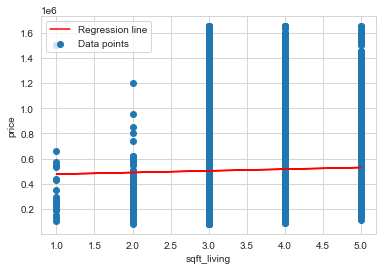

In [47]:
#plot a line of fit
plt.scatter(x, y, label="Data points")
plt.plot(x, model_results.predict(sm.add_constant(x)), color="red", label="Regression line")
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend()
plt.show()

This line represents the best-fit linear relationship between the 'sqft_living' and 'price' variables as learned by the model.

**Conclusion**

• The Simple linear regression model built has an R-squared value of 0.45 which indicates that the model can explain 45% of the variance of the sale prices which is a good sign that the model is effective in predicting the prices.
The remaining 55% of the variance in house prices is unexplained bythe model. 

•	The Bivariant model, incorporating two feature variables shows a slight decline to Simple linear regression over the baseline

•	The most impactful features for inferring and predicting house sale prices we found to be the square footage of the living area, bedrooms.


•	The multilinear regression model built has an R-squared value of 0.61 which indicates that the model can explain 61% of the variance of the sale prices which is a good sign that the model is effective in predicting the prices.
The remaining 39% of the variance in house prices is unexplained bythe model. This unexplained variance, often referred to as "residual variance," represents the part of house price fluctuations that your model cannot account for.

•	Our model (Multilinear Regression is off by about 119,189 dollars for each prediction of the price

### WHY MULTILINEAR

After thorough analysis and consideration of the project's goals and stakeholders' needs, we chose the MultiLinear Regression model as the foundation for our recommendations. Here's why:
1. Model Performance:

The MultiLinear Regression model achieved an R-squared (R^2) value of 61%, indicating that it explains approximately 61% of the variance in house prices using the selected features. This level of explained variance is substantial and suggests that the model captures a significant portion of the price variation.
2. Interpretability and Transparency:
It provides clear, easily understandable coefficient estimates for each feature. 

3. Business Goals:

Our primary project goal is to assist homeowners in making data-driven decisions about home renovations that can increase the estimated value of their homes. The MultiLinear Regression model is well-suited to this objective. It provides a clear understanding of the relationships between independent variables (features) and house prices, enabling us to offer actionable recommendations in plain language.

4. Comparison with Simple Linear and Bivariate Models:

When compared to the two other modeling approaches (simple linear regression and bivariate models), the multiLinear regression model exhibited significantly superior performance.


**Recommendation**


• Focus on Square Footage: The regression analysis indicates that an increase in square footage (specifically, square feet of living area) is associated with higher estimated house prices. Therefore, homeowners should consider expanding their living space through home renovations or additions. This could include room extensions, converting unused spaces, or even building an additional floor if feasible.

• Consider Multi-Story Design: The number of floors in a property also affects its estimated price positively. Homeowners interested in substantial renovations might explore the possibility of adding additional floors or converting existing space into additional stories. Multi-story designs can potentially increase a property's value.

• Bathroom Renovations: The analysis highlights that adding or renovating bathrooms tends to have a positive impact on estimated house prices. Homeowners looking to increase their property's value should consider bathroom renovations or additions. These upgrades could involve modern fixtures, improved plumbing, or even creating en-suite bathrooms where possible.

• In summary, homeowners looking to increase the estimated value of their homes should focus on square footage, bathroom renovations, property maintenance, and modernization. However, it's essential to consider each property's unique characteristics and consult with real estate professionals for personalized advice based on local market dynamics.